In [1]:
data=!unzip /content/archive.zip -d/content/data

In [2]:
!ls /content/data

personality_dataset.csv


In [68]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score ,train_test_split
from sklearn.metrics import accuracy_score ,f1_score,classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [4]:
df=pd.read_csv('/content/data/personality_dataset.csv')

In [51]:
df.sample(5)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
1595,4.0,Yes,2.0,1.0,Yes,3.0,2.0,Introvert
2603,11.0,Yes,2.0,0.0,Yes,5.0,0.0,Introvert
2575,0.0,No,7.0,4.0,No,11.0,6.0,Extrovert
292,4.0,Yes,0.0,0.0,Yes,1.0,0.0,Introvert
382,3.0,No,3.0,6.0,No,6.0,5.0,Extrovert


# understanding data

In [ ]:
df.shape

(2900, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [ ]:
df.isnull().sum()

,0
Time_spent_Alone,63
Stage_fear,73
Social_event_attendance,62
Going_outside,66
Drained_after_socializing,52
Friends_circle_size,77
Post_frequency,65
Personality,0


In [ ]:
# df.duplicated().sum()

np.int64(388)

# univerante analysis

<Axes: xlabel='Personality', ylabel='count'>

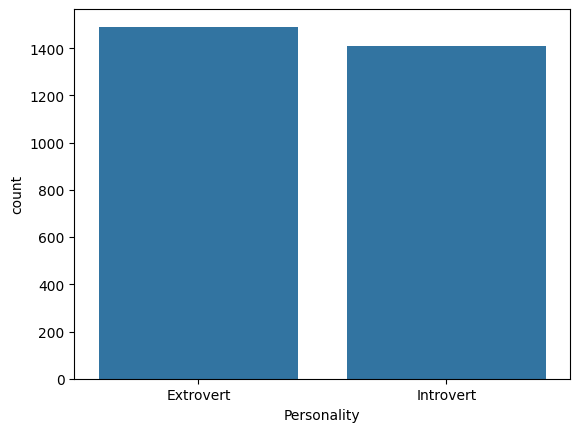

In [ ]:
sns.countplot(x=df['Personality'],)

<Axes: xlabel='Stage_fear', ylabel='count'>

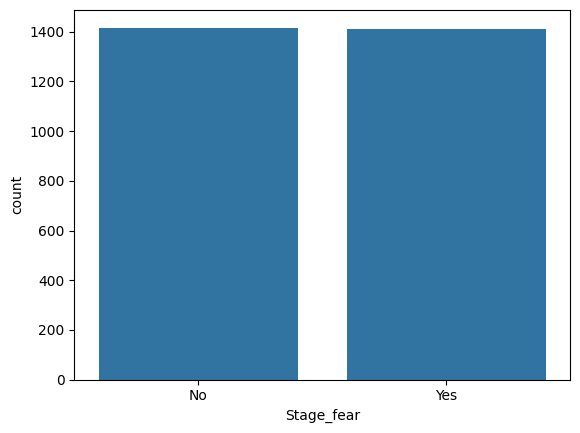

In [ ]:
sns.countplot(x=df['Stage_fear'])

<Axes: xlabel='Drained_after_socializing', ylabel='count'>

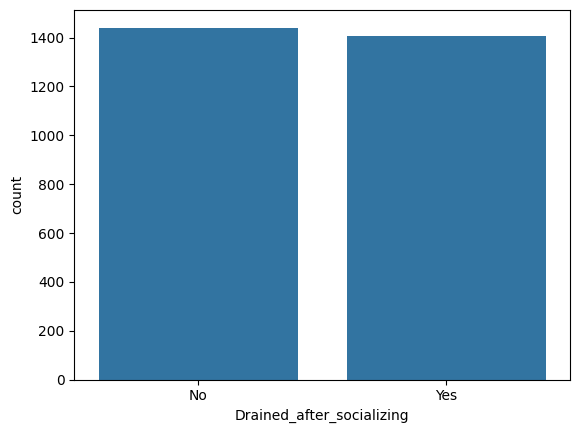

In [ ]:
sns.countplot(x=df['Drained_after_socializing'])

In [ ]:
num_col =['Time_spent_Alone','Social_event_attendance','Going_outside','Friends_circle_size','Post_frequency']

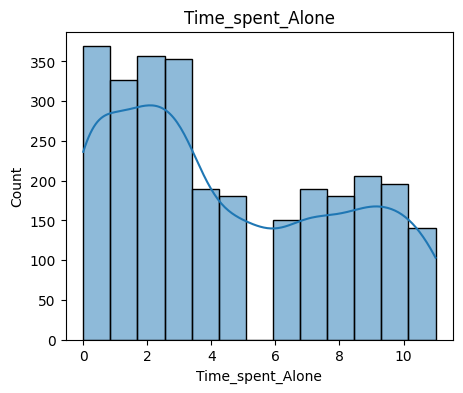

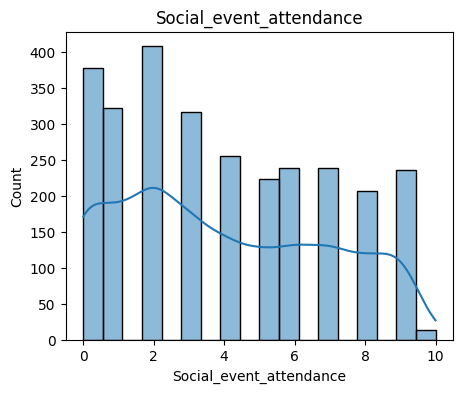

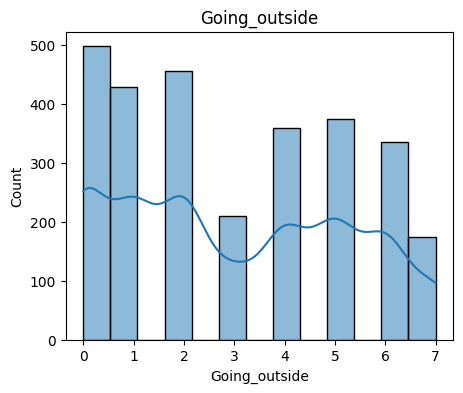

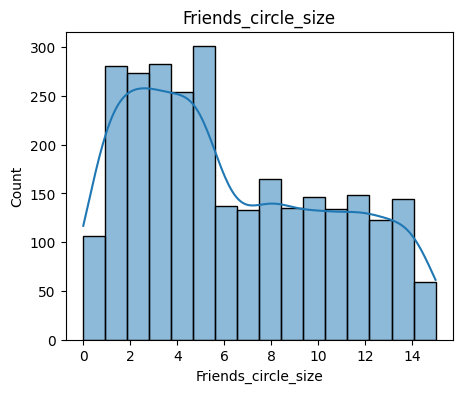

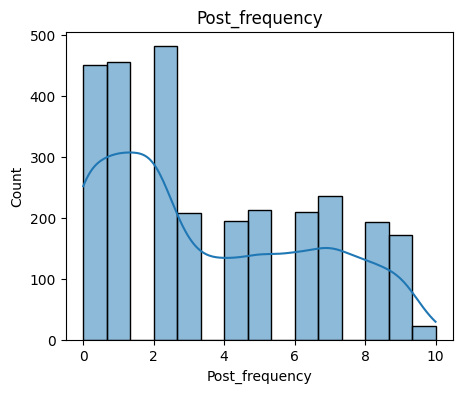

In [ ]:
for col in num_col:
  plt.figure(figsize=(5,4))
  sns.histplot(df[col],kde=True)
  plt.title(col)
  plt.show()

Time_spent_Alone   max = 11.0   min=  0.0   mean= 4.505816002819881   skew=  0.38582142719550133


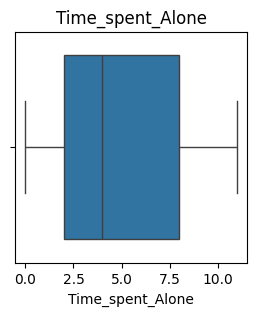

Social_event_attendance   max = 10.0   min=  0.0   mean= 3.963354474982382   skew=  0.29474159582831416


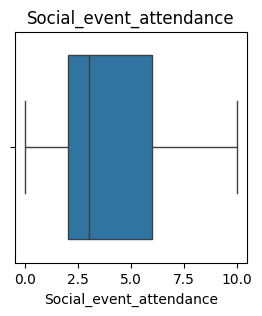

Going_outside   max = 7.0   min=  0.0   mean= 3.0   skew=  0.1928914860066729


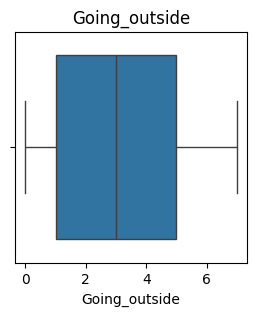

Friends_circle_size   max = 15.0   min=  0.0   mean= 6.268862911795962   skew=  0.4250506100948436


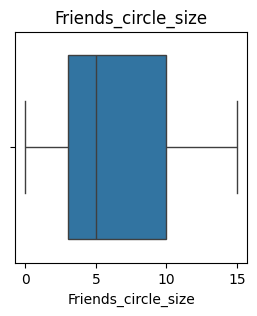

Post_frequency   max = 10.0   min=  0.0   mean= 3.564726631393298   skew=  0.4745104224298816


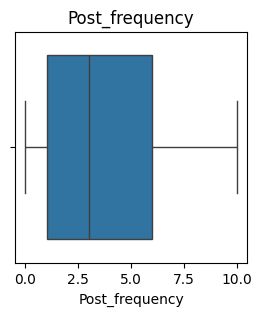

In [ ]:
for col in num_col:
  print(col,' ', 'max =',df[col].max(),' ','min= ',df[col].min(),' ','mean=',df[col].mean(),' ' ,'skew= ',df[col].skew())
  plt.figure(figsize=(3,3))
  sns.boxplot(x=df[col])
  plt.title(col)
  plt.show()

# bivariate-analysis

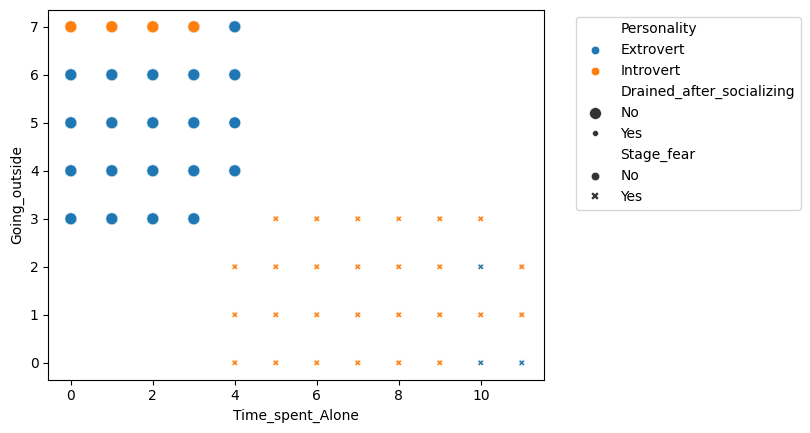

In [ ]:
sns.scatterplot(x=df['Time_spent_Alone'],y=df['Going_outside'],hue=df['Personality'],style=df['Stage_fear'],size=df['Drained_after_socializing'])
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')


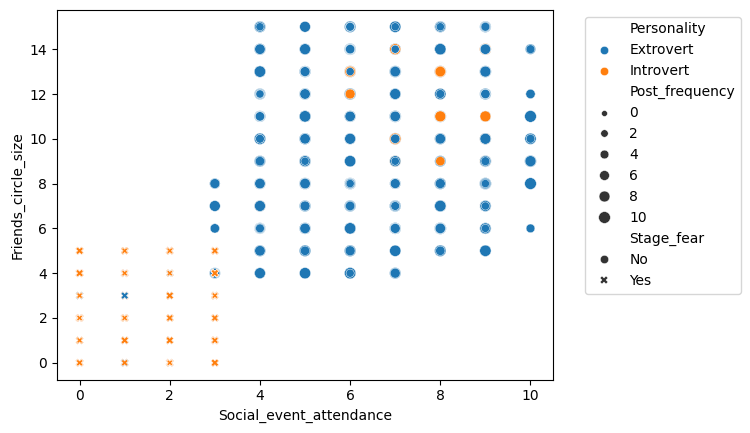

In [ ]:
sns.scatterplot(x=df['Social_event_attendance'],y=df['Friends_circle_size'],hue=df['Personality'],size=df['Post_frequency'],style=df['Stage_fear'])
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')

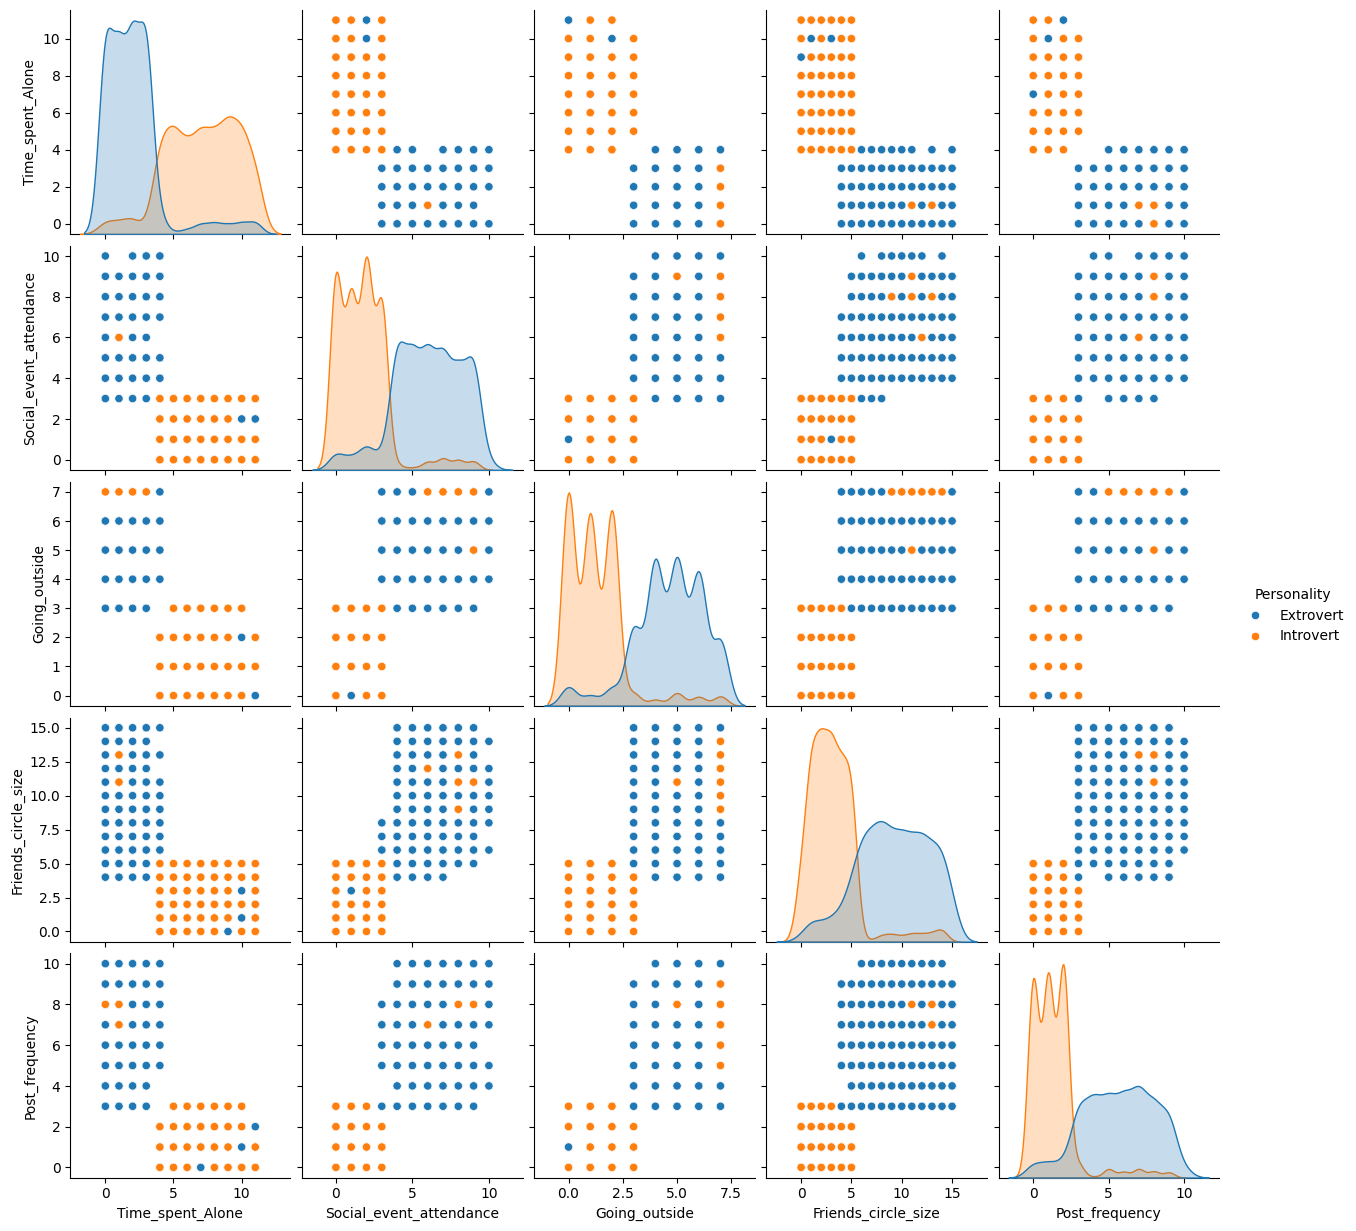

In [ ]:
sns.pairplot(df,hue='Personality')

# Model training

In [5]:
# data=df.drop_duplicates(keep='first')

In [83]:
feature= df.iloc[:,:7]
target=df.iloc[:,-1]

In [87]:
target = target.map({'Introvert': 0, 'Extrovert': 1}) # target encoding

In [88]:
# split data
X_train, X_test, y_train, y_test = train_test_split(
    feature, target, test_size=0.2, random_state=40
)

In [89]:
# list numerical Columns
numerical_cols = [
    'Time_spent_Alone',
    'Social_event_attendance',
    'Going_outside',
    'Friends_circle_size',
    'Post_frequency'
]

In [90]:
# list out categorical columns
categorical_cols = ['Stage_fear', 'Drained_after_socializing']

In [91]:
# create pipeline for fill null value and scale for numerical columns
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [92]:
# create pipline for impute and one hot encoding for categorical columns
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', dtype=int))
])

In [93]:
# combine both pipelines
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])


In [94]:
# create pipeline for model
svm_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', SVC(kernel='rbf', probability=True, decision_function_shape='ovo'))
])

In [95]:
# fit model
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Time_spent_Alone',
                                                   'Social_event_attendance',
                                                   'Going_outside',
                                                   'Friends_circle_size',
                                                   'Post_frequency']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype=<class 'int'>))]),
                                                  ['Stage_fear',
                                                   'Drained_after_socializing'])])),
                ('model',
                 SVC(decision_function_shape='ovo', probability=True))])

In [96]:
# predict values
y_pred = svm_pipeline.predict(X_test)

In [97]:
# get score
print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy Score: 0.946551724137931

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       283
           1       0.97      0.93      0.95       297

    accuracy                           0.95       580
   macro avg       0.95      0.95      0.95       580
weighted avg       0.95      0.95      0.95       580



# model Save

In [98]:
import joblib

# Save pipeline
joblib.dump(svm_pipeline, 'personality_predictor.pkl')

['personality_predictor.pkl']